![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
import matplotlib.pyplot as plt


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
project_path = '/content/drive/My Drive/'
data = np.load(project_path + "images.npy", allow_pickle = True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [ ]:
data[1][1]

[{'imageHeight': 697,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}]}]

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_SIZE = 224

Height_cells = 28
width_cells = 28


### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
masks

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, masks, test_size = 0.02, random_state = 1)
print(X_train.shape)
print(y_test.shape)

(400, 224, 224, 3)
(9, 224, 224)


Training data

In [ ]:
X_train[100]
 

array([[[ 0.17647064,  0.34117651, -0.05098039],
        [-0.01176471,  0.26274514, -0.18431371],
        [-0.02745098,  0.19215691, -0.2235294 ],
        ...,
        [-0.77254903, -0.36470586, -0.68627453],
        [-0.9137255 , -0.33333331, -0.74901962],
        [-0.73333335, -0.3098039 , -0.67058825]],

       [[-0.19999999,  0.13725495, -0.41176468],
        [-0.38823527,  0.12156868, -0.48235291],
        [-0.24705881,  0.06666672, -0.372549  ],
        ...,
        [-1.        , -0.33333331, -0.74117649],
        [-1.        , -0.38039213, -0.80392158],
        [-0.75686276, -0.33333331, -0.67843139]],

       [[-0.41960782,  0.02745104, -0.56078434],
        [-0.11372548,  0.27843142, -0.3098039 ],
        [ 0.23921573,  0.4666667 ,  0.04313731],
        ...,
        [-0.69411767, -0.27843136, -0.63921571],
        [-0.99215686, -0.34117645, -0.74117649],
        [-0.74901962, -0.28627449, -0.63137257]],

       ...,

       [[ 0.10588241,  0.37254906, -0.01960784],
        [-0

Testing data

In [ ]:
print(X_test[0])


[[[ 0.84313726  0.87450981  0.89803922]
  [ 0.8509804   0.88235295  0.90588236]
  [ 0.85882354  0.89019608  0.9137255 ]
  ...
  [ 0.90588236  0.95294118  0.95294118]
  [ 0.88235295  0.92941177  0.92941177]
  [ 0.69411767  0.74117649  0.74117649]]

 [[ 0.8509804   0.88235295  0.90588236]
  [ 0.85882354  0.89019608  0.9137255 ]
  [ 0.85882354  0.89019608  0.9137255 ]
  ...
  [ 0.89803922  0.94509804  0.94509804]
  [ 0.87450981  0.92156863  0.92156863]
  [ 0.7647059   0.81176472  0.81176472]]

 [[ 0.8509804   0.88235295  0.90588236]
  [ 0.85882354  0.89019608  0.9137255 ]
  [ 0.86666667  0.89803922  0.92156863]
  ...
  [ 0.89019608  0.92156863  0.92941177]
  [ 0.88235295  0.9137255   0.92156863]
  [ 0.86666667  0.89803922  0.90588236]]

 ...

 [[-0.68627453 -0.82745099 -0.93725491]
  [-0.68627453 -0.82745099 -0.93725491]
  [-0.69411767 -0.83529413 -0.94509804]
  ...
  [-0.78039217 -0.81960785 -0.81960785]
  [-0.79607844 -0.82745099 -0.83529413]
  [-0.80392158 -0.83529413 -0.84313726]]

 [

In [ ]:
print(y_test[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


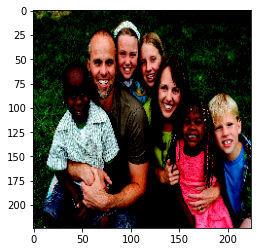

In [ ]:
plt.imshow(X_train[100])

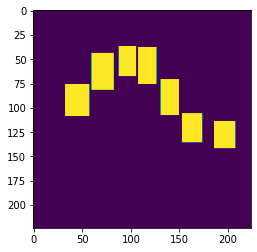

In [ ]:
plt.imshow(y_train[100])

Print the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


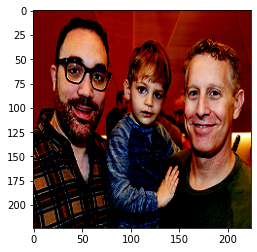

In [ ]:
plt.imshow(X_test[2])

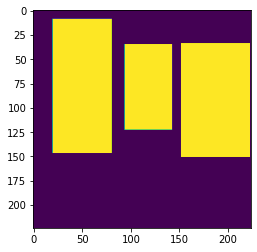

In [ ]:
plt.imshow(y_test[2])

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
#from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_2_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4= model.get_layer("conv_pw_11_relu").output
    block5 = model.get_layer("conv_pw_13_relu").output
    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x= UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224,224))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model= create_model(False)

### Print model summary (1 mark)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
import tensorflow

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (2 marks)

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr= 1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = loss, optimizer = optimizer, metrics = [dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 50, batch_size=1, verbose = 1)

Epoch 1/50
400/400 [==============================] - 305s 762ms/step - loss: 1.9942 - dice_coefficient: 0.2769 - val_loss: 1.4183 - val_dice_coefficient: 0.3874
Epoch 2/50
400/400 [==============================] - 298s 746ms/step - loss: 1.2302 - dice_coefficient: 0.4318 - val_loss: 1.1125 - val_dice_coefficient: 0.4779
Epoch 3/50
400/400 [==============================] - 295s 737ms/step - loss: 1.0574 - dice_coefficient: 0.4921 - val_loss: 1.0015 - val_dice_coefficient: 0.5182
Epoch 4/50
400/400 [==============================] - 302s 754ms/step - loss: 0.9797 - dice_coefficient: 0.5227 - val_loss: 1.0144 - val_dice_coefficient: 0.5162
Epoch 5/50
400/400 [==============================] - 306s 764ms/step - loss: 0.9325 - dice_coefficient: 0.5421 - val_loss: 1.0284 - val_dice_coefficient: 0.5143
Epoch 6/50
400/400 [==============================] - 305s 763ms/step - loss: 0.9043 - dice_coefficient: 0.5543 - val_loss: 0.9500 - val_dice_coefficient: 0.5425
Epoch 7/50
400/400 [========

In [ ]:
model.evaluate(X_test, y_test, verbose = 1)

9/9 [==============================] - 5s 574ms/step - loss: 0.9716 - dice_coefficient: 0.5109


[0.9716361165046692, 0.510931134223938]

In [ ]:
So dice_coefficient is above 0.5 which means its a good model

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


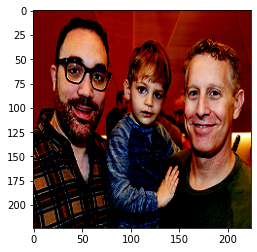

In [ ]:
plt.imshow(X_test[2])

Show original mask for test image

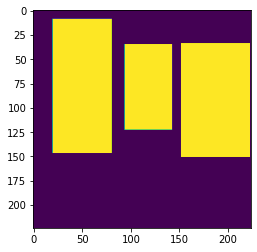

In [ ]:
plt.imshow(y_test[2])

In [ ]:
import numpy as np

Predict the mask on the test image

In [ ]:
y_pred = model.predict(X_test, verbose = 1)
y_pred.shape



1/1 [==============================] - 0s 6ms/step


(9, 224, 224)

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

In [ ]:
y_predict = (y_pred>0.5).astype(np.uint8)

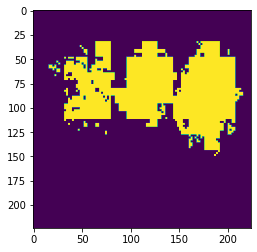

In [ ]:
plt.imshow(y_predict[2]) #This is the mask imposed on y_test[2]

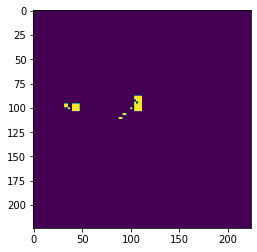

In [ ]:
plt.imshow(y_predict[4])